# **IMPORT NECESSARY LIBRARIES**

In [125]:
!pip install pmdarima

In [126]:
!pip install statsmodels

In [127]:
!pip install tensorflow

In [128]:
!pip install ydata-profiling

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.metrics import mean_squared_error
import math

In [130]:
gp=pd.read_csv("Gold_data.csv",index_col=0, parse_dates=True)
gp

,price
date,
2016-01-01,2252.60
2016-01-02,2454.50
2016-01-03,2708.10
2016-01-04,2577.80
2016-01-05,2597.75
...,...
2021-12-17,4394.40
2021-12-18,4389.50
2021-12-19,4389.50


gp1 is the copy gp(days) for weekly and yearly



# **EDA**

In [131]:
gp1=gp.copy()
gp1.head(5)

,price
date,
2016-01-01,2252.60
2016-01-02,2454.50
2016-01-03,2708.10
2016-01-04,2577.80
2016-01-05,2597.75


### **Weekly Prices**

In [132]:
# Resampling the week

gp_week = gp1.resample('W').mean()
print(gp_week.head())

                  price
date                   
2016-01-03  2471.733333
2016-01-10  2740.778571
2016-01-17  2439.657143
2016-01-24  2385.528571
2016-01-31  2427.692857


### **Yearly Prices**

In [133]:
# Resampling the years

gp_year = gp1.resample('Y').mean()
print(gp_year)


                  price
date                   
2016-12-31  2690.614162
2017-12-31  2626.676484
2018-12-31  2781.938082
2019-12-31  3150.210685
2020-12-31  4216.378689
2021-12-31  4266.871549


<ipython-input-133-23309f35cb68>:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  gp_year = gp1.resample('Y').mean()


### **Monthly Prices**

In [134]:
# Resampling the 2months

gp = gp.resample('2M').mean()
print(gp)

                  price
date                   
2016-01-31  2495.832258
2016-03-31  2685.681667
2016-05-31  2677.718852
2016-07-31  2762.868033
2016-09-30  2792.468852
2016-11-30  2697.745902
2017-01-31  2594.880645
2017-03-31  2620.855932
2017-05-31  2613.193443
2017-07-31  2603.425410
2017-09-30  2655.757377
2017-11-30  2647.374590
2018-01-31  2680.561290
2018-03-31  2766.871186
2018-05-31  2806.575410
2018-07-31  2760.172951
2018-09-30  2749.364754
2018-11-30  2821.234426
2019-01-31  2920.593548
2019-03-31  3027.228814
2019-05-31  2974.673770
2019-07-31  3118.137705
2019-09-30  3331.736066
2019-11-30  3287.800000
2020-01-31  3551.190323
2020-03-31  3909.516667
2020-05-31  4197.957377
2020-07-31  4323.365574
2020-09-30  4446.298361
2020-11-30  4351.322951
2021-01-31  4318.198387
2021-03-31  4161.255932
2021-05-31  4303.524590
2021-07-31  4286.083607
2021-09-30  4236.683607
2021-11-30  4308.075410
2022-01-31  4312.733333


<ipython-input-134-0c484d03988c>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  gp = gp.resample('2M').mean()


gp2 is the copy gp(months)

In [135]:
# copy of months data
gp2=gp.copy()
gp2.head(5)

,price
date,
2016-01-31,2495.832258
2016-03-31,2685.681667
2016-05-31,2677.718852
2016-07-31,2762.868033
2016-09-30,2792.468852


In [136]:
gp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37 entries, 2016-01-31 to 2022-01-31
Freq: 2ME
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   37 non-null     float64
dtypes: float64(1)
memory usage: 592.0 bytes


In [137]:
# Display the first few rows of the dataset
print(gp.head())

                  price
date                   
2016-01-31  2495.832258
2016-03-31  2685.681667
2016-05-31  2677.718852
2016-07-31  2762.868033
2016-09-30  2792.468852


In [138]:
# Display the last few rows of the dataset
print(gp.tail())

                  price
date                   
2021-05-31  4303.524590
2021-07-31  4286.083607
2021-09-30  4236.683607
2021-11-30  4308.075410
2022-01-31  4312.733333


In [139]:
gp.shape

(37, 1)

In [140]:
gp.describe()

,price
count,37.000000
mean,3291.863757
std,717.872171
min,2495.832258
25%,2685.681667
50%,2920.593548
75%,4197.957377
max,4446.298361


In [141]:
gp.isnull().sum()

price    0
dtype: int64

In [142]:
# duplicates
gp.duplicated().sum()

0

In [143]:
gp["price"].unique()

array([2495.83225806, 2685.68166667, 2677.71885246, 2762.86803279,
       2792.46885246, 2697.74590164, 2594.88064516, 2620.8559322 ,
       2613.19344262, 2603.42540984, 2655.75737705, 2647.37459016,
       2680.56129032, 2766.87118644, 2806.57540984, 2760.17295082,
       2749.3647541 , 2821.23442623, 2920.59354839, 3027.22881356,
       2974.67377049, 3118.13770492, 3331.73606557, 3287.8       ,
       3551.19032258, 3909.51666667, 4197.95737705, 4323.36557377,
       4446.29836066, 4351.32295082, 4318.1983871 , 4161.2559322 ,
       4303.52459016, 4286.08360656, 4236.68360656, 4308.07540984,
       4312.73333333])

In [144]:
gp["price"].value_counts()

price
2495.832258    1
3027.228814    1
3118.137705    1
3331.736066    1
3287.800000    1
3551.190323    1
3909.516667    1
4197.957377    1
4323.365574    1
4446.298361    1
4351.322951    1
4318.198387    1
4161.255932    1
4303.524590    1
4286.083607    1
4236.683607    1
4308.075410    1
2974.673770    1
2920.593548    1
2685.681667    1
2821.234426    1
2677.718852    1
2762.868033    1
2792.468852    1
2697.745902    1
2594.880645    1
2620.855932    1
2613.193443    1
2603.425410    1
2655.757377    1
2647.374590    1
2680.561290    1
2766.871186    1
2806.575410    1
2760.172951    1
2749.364754    1
4312.733333    1
Name: count, dtype: int64

In [145]:
gp.corr()

,price
price,1.0


# **VISUALIZATIONS**

# **Gold prices over Days**

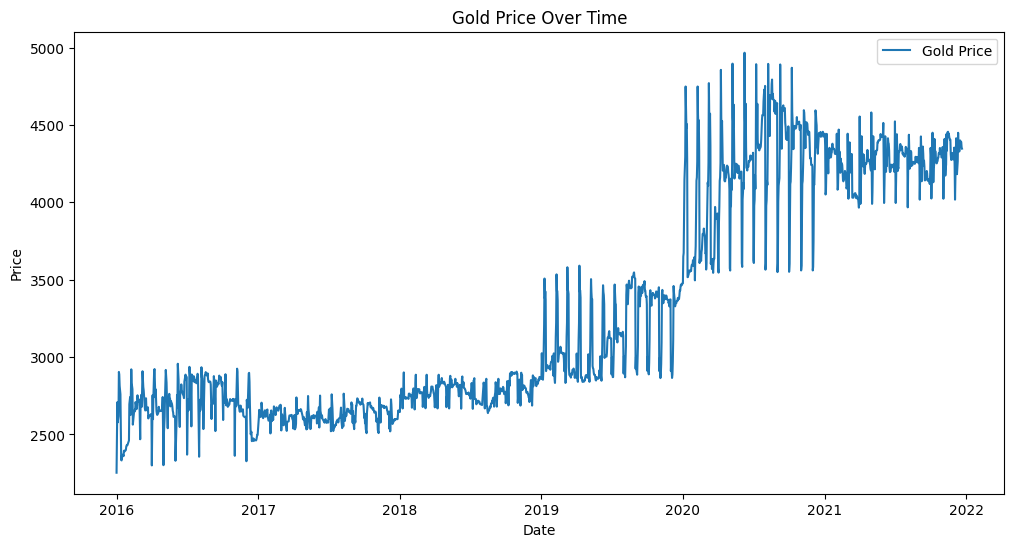

In [146]:
# Plot the prices of gold over time
plt.figure(figsize=(12, 6))
plt.plot(gp1['price'], label='Gold Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Price Over Time')
plt.legend()
plt.show()

### **Gold prices over Weekly**

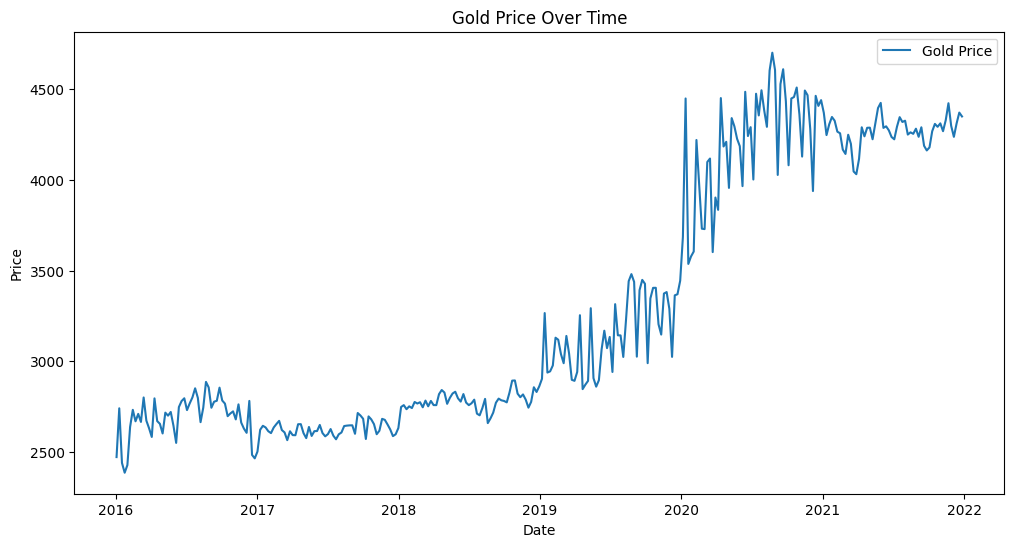

In [147]:
# Plot the prices of gold over time
plt.figure(figsize=(12, 6))
plt.plot(gp_week['price'], label='Gold Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Price Over Time')
plt.legend()
plt.show()

### **Gold prices over Months**

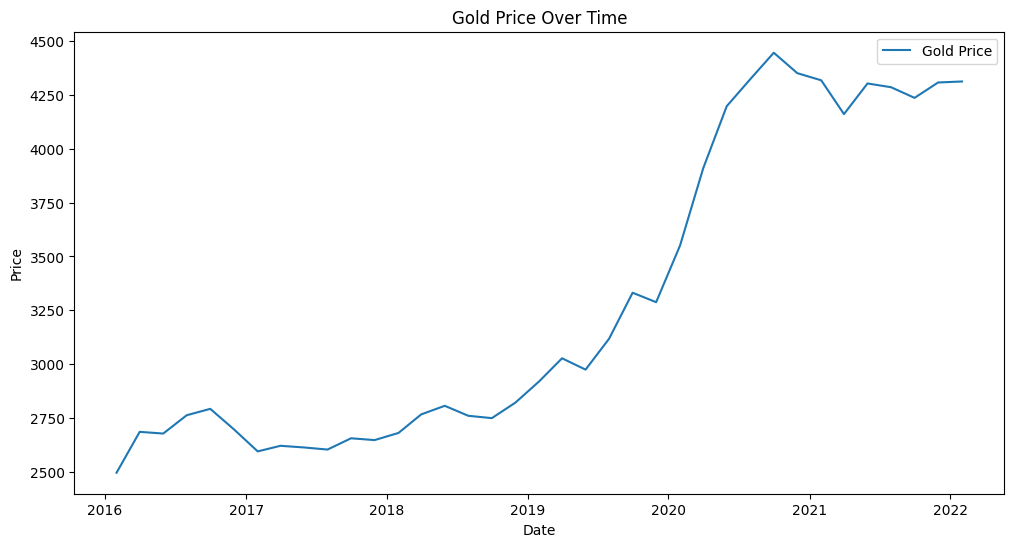

In [148]:
# Plot the prices of gold over time
plt.figure(figsize=(12, 6))
plt.plot(gp['price'], label='Gold Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Price Over Time')
plt.legend()
plt.show()

### **Gold prices over Years**

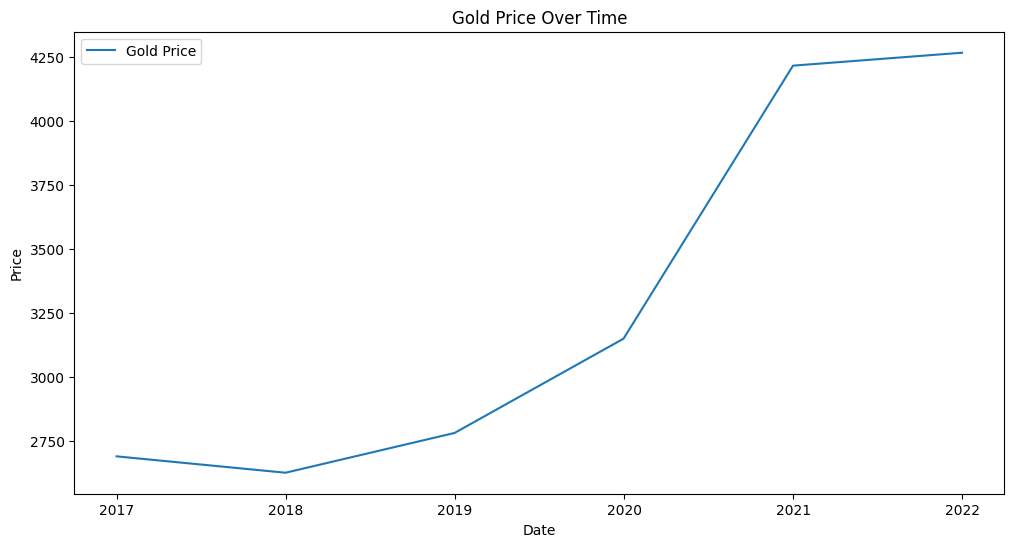

In [149]:
# Plot the prices of gold over time
plt.figure(figsize=(12, 6))
plt.plot(gp_year['price'], label='Gold Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Price Over Time')
plt.legend()
plt.show()

### **Boxplot over months**

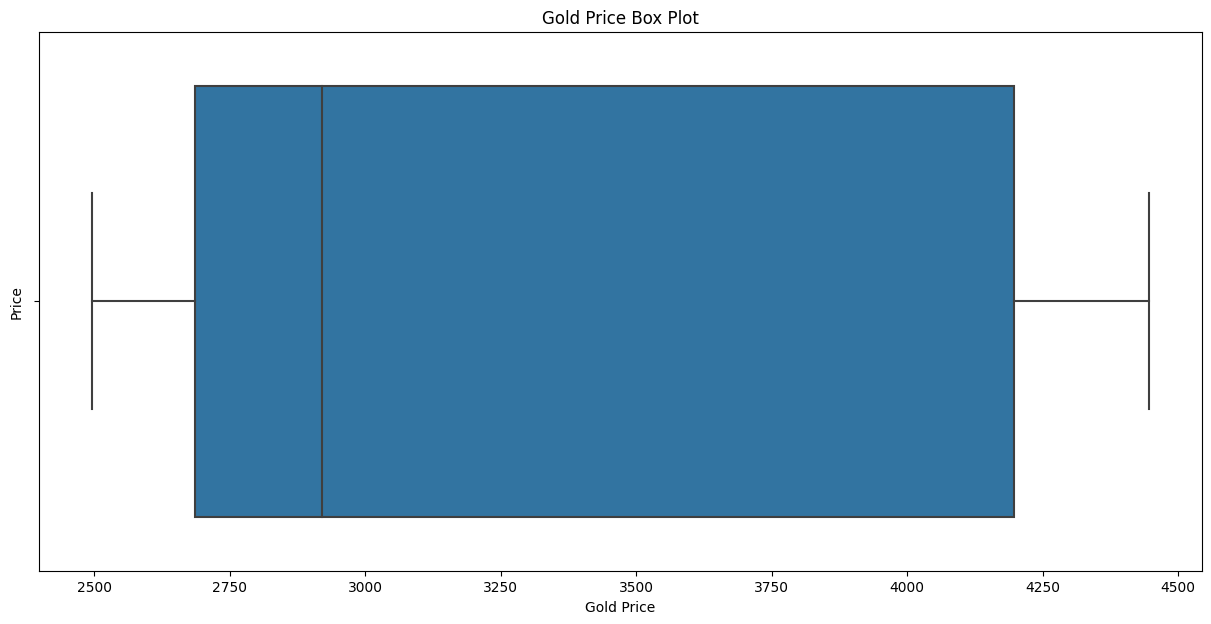

In [150]:
# Boxplot of gold price
plt.figure(figsize=(15,7))
sns.boxplot(x=gp["price"])
plt.xlabel("Gold Price")
plt.ylabel("Price")
plt.title("Gold Price Box Plot")
plt.show()

### **Histogram over Months**

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


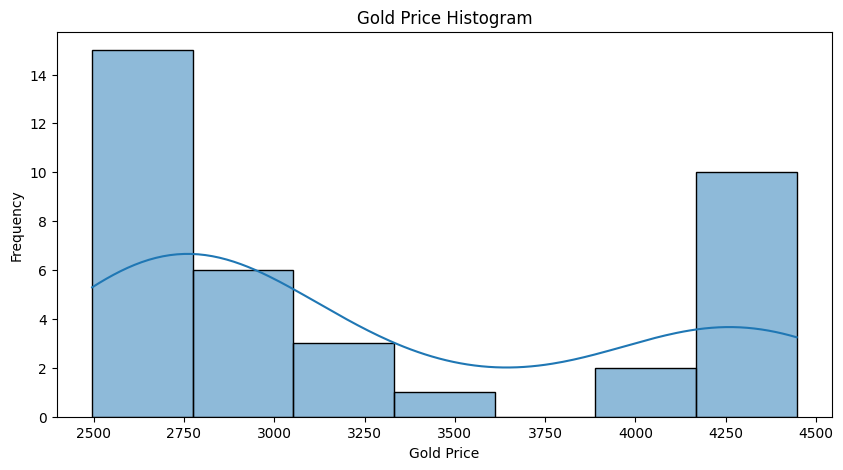

In [151]:
# Histogram of gold price
plt.figure(figsize=(10,5))
sns.histplot(gp['price'], kde=True)
plt.xlabel("Gold Price")
plt.ylabel("Frequency")
plt.title("Gold Price Histogram")
plt.show()

### **Scatter plot over months**

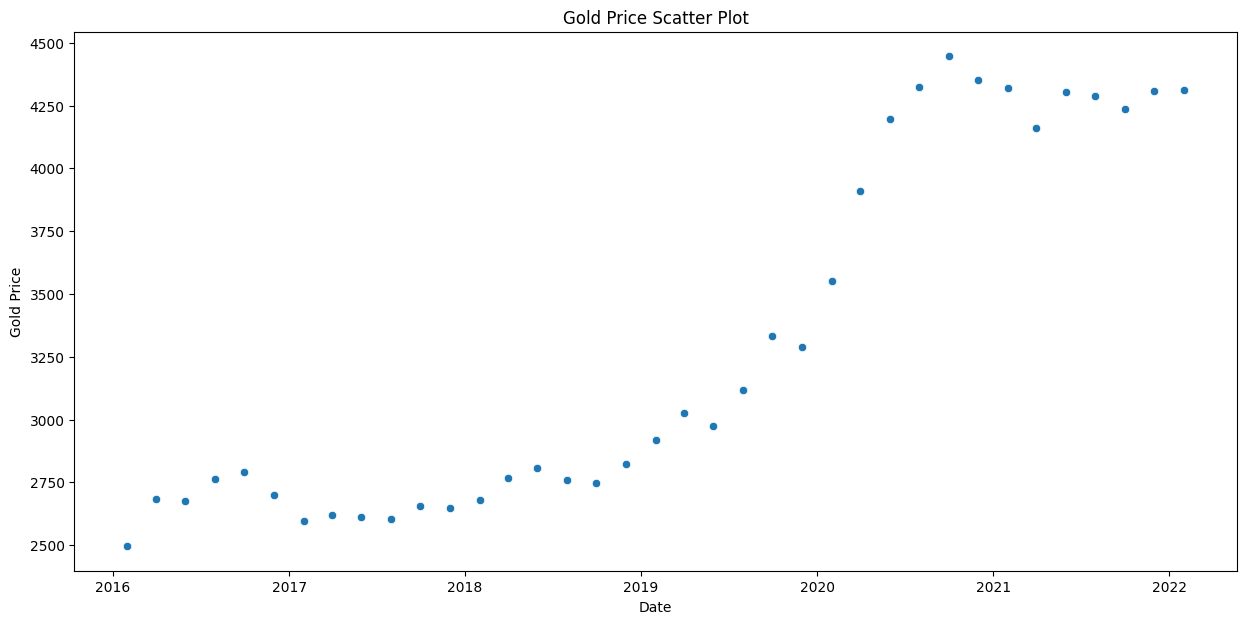

In [152]:
# Scatter plot of gold price vs. date
plt.figure(figsize=(15,7))
sns.scatterplot(gp["price"])
plt.xlabel("Date")
plt.ylabel("Gold Price")
plt.title("Gold Price Scatter Plot")
plt.show()

### **Bar chart over years**

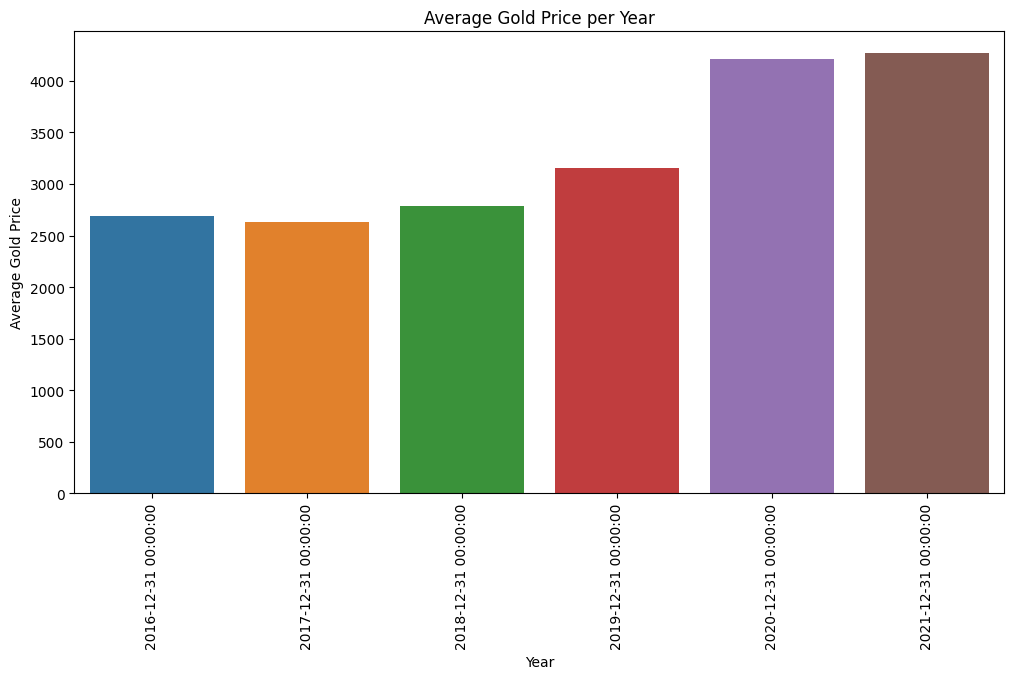

In [153]:
# Create a bar chart of the average gold price per year
gp_year.reset_index(inplace=True)
plt.figure(figsize=(12, 6))
sns.barplot(x='date', y='price', data=gp_year)
plt.xlabel('Year')
plt.ylabel('Average Gold Price')
plt.title('Average Gold Price per Year')
plt.xticks(rotation=90)
plt.show()


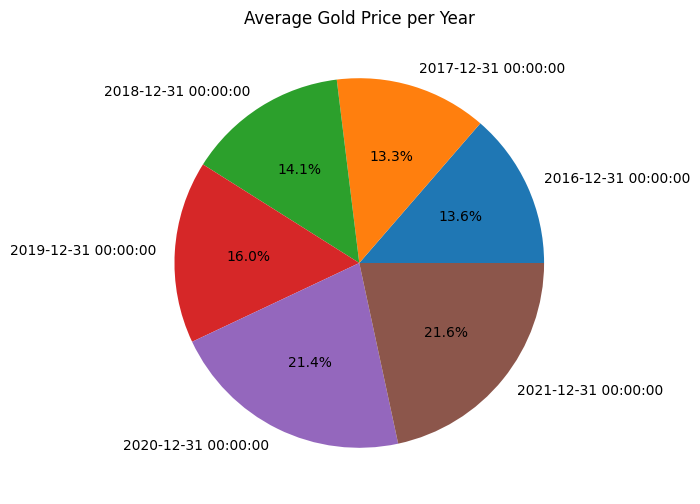

In [154]:
# Create a pie chart of the average gold price per year
gp_year_avg = gp_year.groupby('date')['price'].mean().reset_index()
plt.figure(figsize=(12, 6))
plt.pie(gp_year_avg['price'], labels=gp_year_avg['date'], autopct="%1.1f%%")
plt.title('Average Gold Price per Year')
plt.show()


## **Lag Plot**

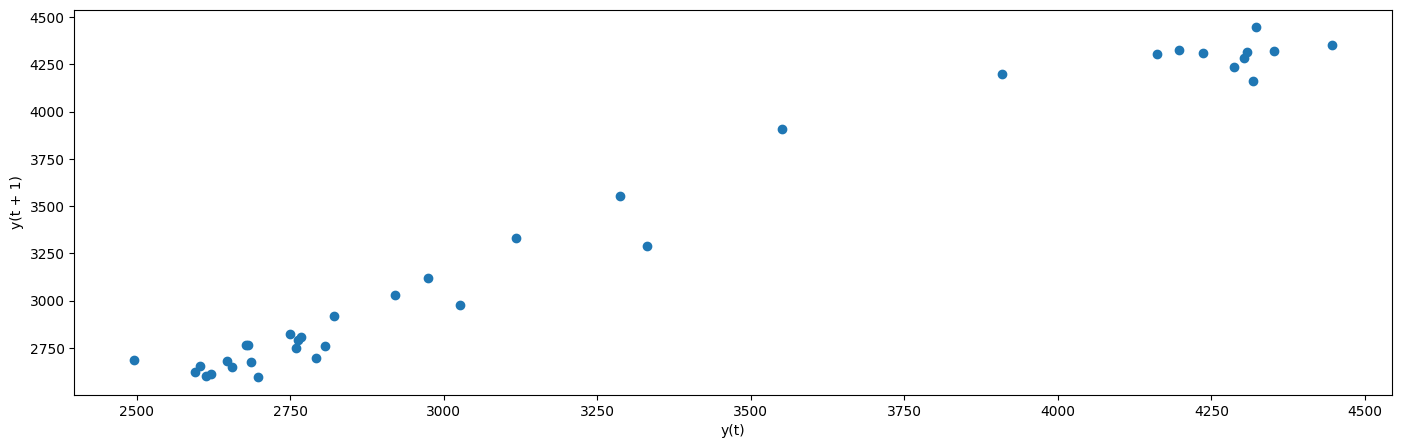

In [155]:
plt.figure(figsize = (17,5))
pd.plotting.lag_plot(gp["price"])
plt.show()

## **Acf and Pacf Plot**

<Figure size 1500x700 with 0 Axes>

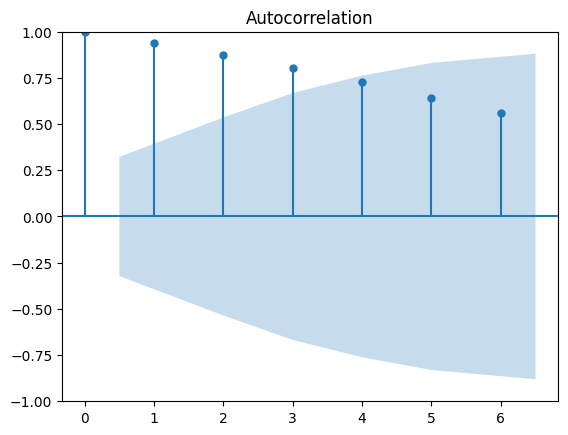

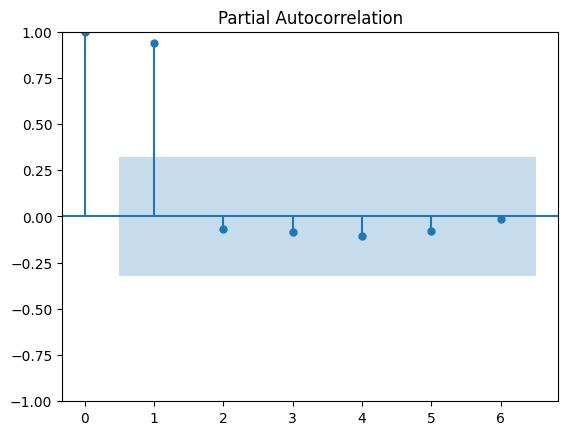

In [156]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot the autocorrelation function (ACF) and partial autocorrelation function (PACF)
plt.figure(figsize=(15, 7))
plot_acf(gp['price'], lags=6)
plot_pacf(gp['price'], lags=6)
plt.show()


## **Seasonal Decomposition**

<Figure size 640x480 with 0 Axes>

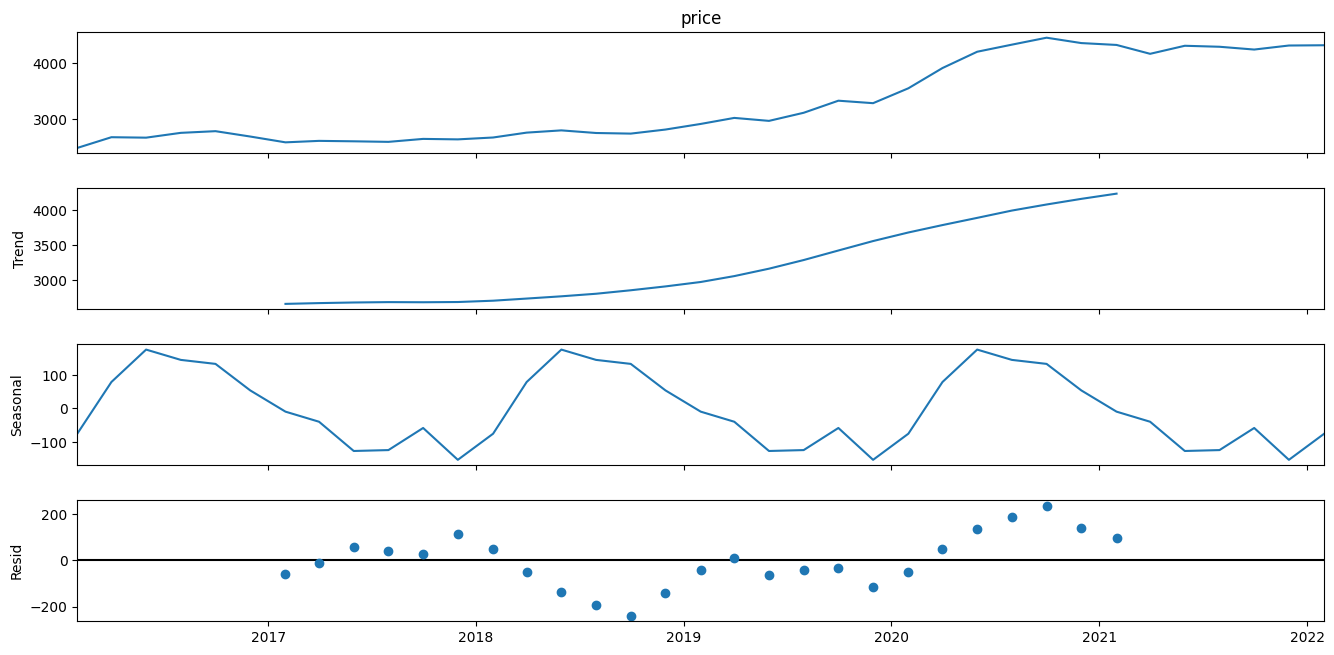

In [157]:
#seasonal decompose
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(gp['price'], model='additive', period=12)  # Seasonal Decomposition of Time Series
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15, 7)
plt.show()


# **REPORT GENERATING**

In [158]:
# create report using ydata profilling
import ydata_profiling

profile = ydata_profiling.ProfileReport(gp)

# Display the report
profile.to_file("output.html")


/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# **STATIONARY CHECK**

In [159]:
# kpss test

from statsmodels.tsa.stattools import kpss

kpss_result = kpss(gp['price'])

print('KPSS Statistic:', kpss_result[0])
print('p-value:', kpss_result[1])
print('Critical Values:')
for key, value in kpss_result[3].items():
  print(f'{key}: {value}')


KPSS Statistic: 0.7388551530452209
p-value: 0.01001316790497992
Critical Values:
10%: 0.347
5%: 0.463
2.5%: 0.574
1%: 0.739


In [160]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the gold price data
scaler.fit(gp['price'].values.reshape(-1, 1))

# Transform the gold price data using the fitted scaler
gp['price'] = scaler.transform(gp['price'].values.reshape(-1, 1))

# Print the transformed data
print(gp['price'].head())


date
2016-01-31    0.000000
2016-03-31    0.097335
2016-05-31    0.093253
2016-07-31    0.136909
2016-09-30    0.152085
Freq: 2ME, Name: price, dtype: float64


In [161]:
# kpss test

from statsmodels.tsa.stattools import kpss

kpss_result = kpss(gp['price'])

print('KPSS Statistic:', kpss_result[0])
print('p-value:', kpss_result[1])
print('Critical Values:')
for key, value in kpss_result[3].items():
  print(f'{key}: {value}')


KPSS Statistic: 0.7388551530452205
p-value: 0.01001316790497995
Critical Values:
10%: 0.347
5%: 0.463
2.5%: 0.574
1%: 0.739


# **Split The Data**

In [162]:
train = gp[:int(len(gp)*0.7)]
test = gp[int(len(gp)*0.7):]

In [163]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25 entries, 2016-01-31 to 2020-01-31
Freq: 2ME
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   25 non-null     float64
dtypes: float64(1)
memory usage: 400.0 bytes


In [164]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12 entries, 2020-03-31 to 2022-01-31
Freq: 2ME
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   12 non-null     float64
dtypes: float64(1)
memory usage: 192.0 bytes


# **MODEL SELECTION**
1.Holts winter exponential smoothing with additive seasonality and additive trend

2.Arima Model

3.LSTM Model

4.GRU Model

5.Linear regression

### **Holts winter exponential smoothing with additive seasonality and additive trend**

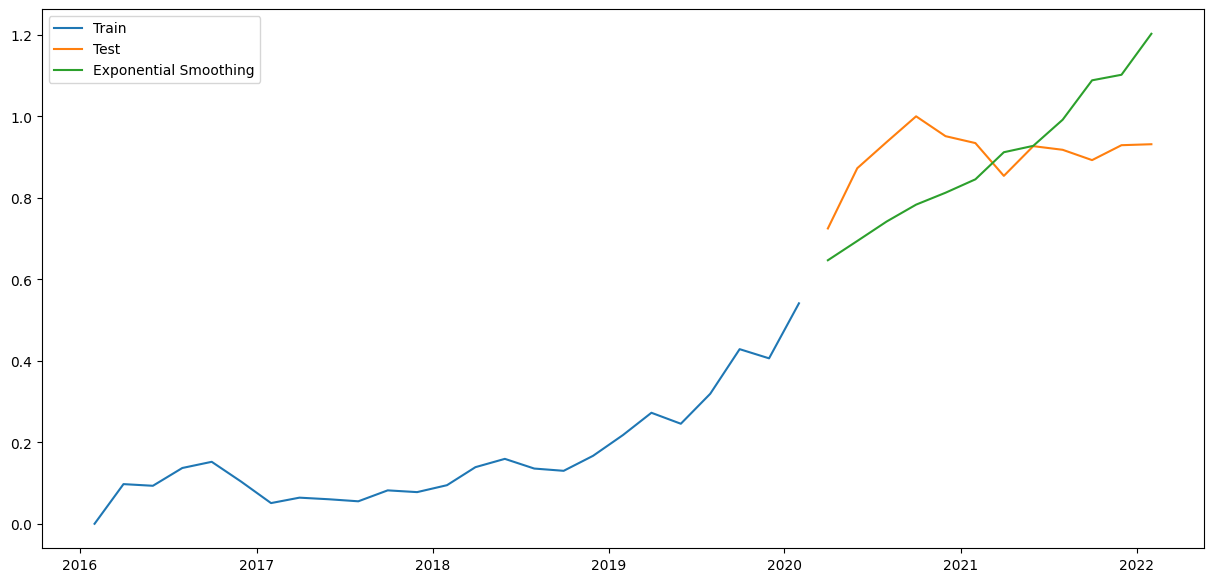

The root mean squared error is:  0.15830747886580762


In [165]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model1 = ExponentialSmoothing(train['price'], trend='add', seasonal='add', seasonal_periods=12)
model1_fit = model1.fit()
yhat = model1_fit.forecast(len(test))
plt.figure(figsize=(15,7))
plt.plot(train['price'], label='Train')
plt.plot(test['price'], label='Test')
plt.plot(yhat, label='Exponential Smoothing')
plt.legend(loc='best')
plt.show()
# prompt: check for rmse value

eaa_rmse=np.sqrt(mean_squared_error(test['price'],yhat))
print("The root mean squared error is: ",eaa_rmse)

### **LSTM Model**

In [166]:
# prompt: random seed for lstm

import random
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam

# Set the random seed
random.seed(123)
np.random.seed(123)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=64))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(train, train['price'], epochs=100, batch_size=32)

# Evaluate the model
test_predictions = model.predict(test)

# Calculate the mean squared error
mse = mean_squared_error(test['price'], test_predictions)

# Print the mean squared error
print('Mean Squared Error:', mse)
# Calculate the root mean squared error (RMSE)
lstm_rmse = math.sqrt(mean_squared_error(test['price'], test_predictions))

# Print the RMSE
print('lstm_rmse:', lstm_rmse)


Epoch 1/100
1/1 [==============================] - 5s 5s/step - loss: 0.0456
Epoch 2/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0440
Epoch 3/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0425
Epoch 4/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0412
Epoch 5/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0398
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 0.0384
Epoch 7/100
1/1 [==============================] - 0s 17ms/step - loss: 0.0372
Epoch 8/100
1/1 [==============================] - 0s 17ms/step - loss: 0.0357
Epoch 9/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0346
Epoch 10/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0328
Epoch 11/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0317
Epoch 12/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0305
Epoch 13/100
1/1 [==============================] -

# **ARIMA MODEL**

In [167]:
from pmdarima import auto_arima

stepwise_fit = auto_arima(gp['price'],
                          start_p=1, start_q=1, max_p=3, max_q=3,
                          m=12, start_P=0, seasonal=True, d=None, D=1, trace=True,
                          error_action='ignore', suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.87 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-45.975, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-51.654, Time=0.27 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.57 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-45.397, Time=0.10 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=inf, Time=1.47 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=-49.724, Time=0.48 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=0.35 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.58 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=-52.636, Time=0.50 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=-50.636, Time=0.52 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=-50.636, Time=0.41 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.36 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=-48.636, Time=0.56 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=-51.365, Time=

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


25 36


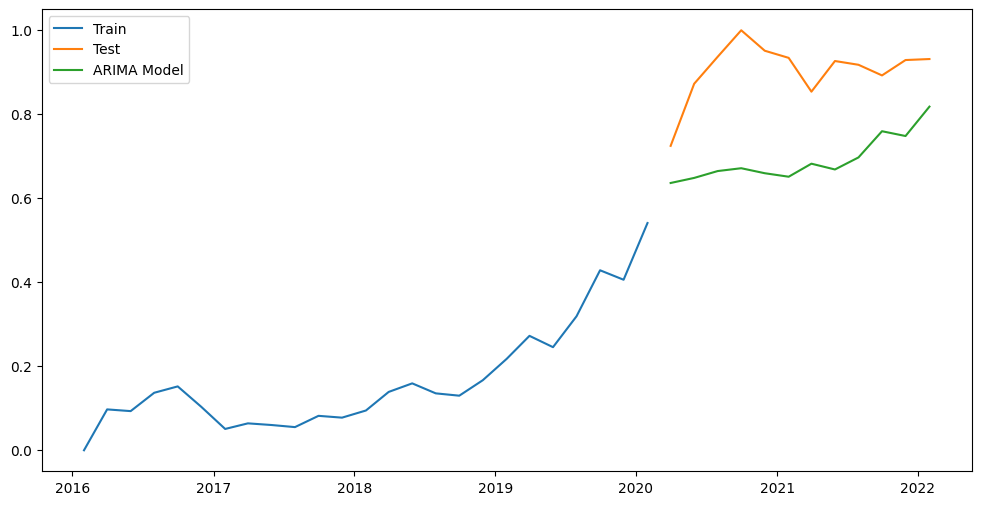

ARIMA RMSE: 0.2260464525148604


In [168]:
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults
# Fit the ARIMA model with the selected order and seasonal order


model = ARIMA(train['price'], order=(1,1,0),seasonal_order=(0,1,2,12))
model_fit = model.fit()
model_fit.summary()

# Make predictions
start = len(train)
end = len(train)+len(test)-1
print(start,end)
pred_arima = model_fit.predict(start=start, end=end)


# Plot the actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(train['price'], label='Train')
plt.plot(test['price'], label='Test')
plt.plot(pred_arima, label='ARIMA Model')
plt.legend(loc='best')
plt.show()

# Calculate the RMSE of the ARIMA model
arima_rmse = np.sqrt(mean_squared_error(test['price'], pred_arima))
print('ARIMA RMSE:', arima_rmse)


### **NAIVE Model**

<ipython-input-169-f456c8908d39>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  naive_predictions = np.array([train['price'][-1]] * len(test))


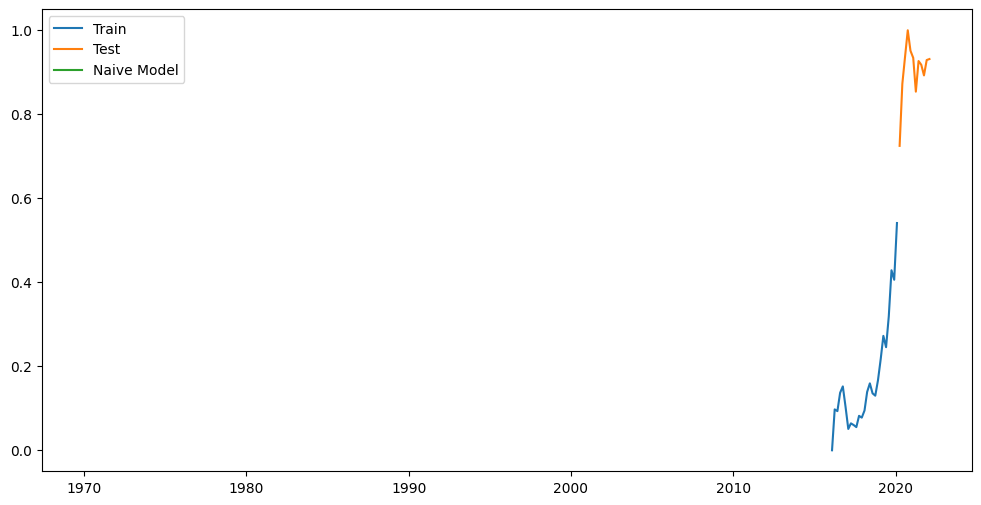

Naive RMSE: 0.3707078952252615


In [169]:
# Create a naive model by taking the last value of the training set as the prediction for each time step in the test set.
naive_predictions = np.array([train['price'][-1]] * len(test))

# Plot the actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(train['price'], label='Train')
plt.plot(test['price'], label='Test')
plt.plot(naive_predictions, label='Naive Model')
plt.legend(loc='best')
plt.show()

naive_rmse = np.sqrt(mean_squared_error(test['price'], naive_predictions))
print('Naive RMSE:', naive_rmse)

# **Finalized Model**

## **Linear Model**




In [170]:
# Import necessary libraries
import numpy as np
from sklearn.linear_model import LinearRegression

# Prepare the data
X = gp.index.to_numpy().reshape(-1, 1)
y = gp['price'].to_numpy()

# Train the model
lrmodel = LinearRegression()
lrmodel.fit(X, y)
X = X.astype(np.float64)

# Make predictions
lr_predictions = lrmodel.predict(X)

# Evaluate the model
from sklearn.metrics import mean_squared_error
lin_rmse = np.sqrt(mean_squared_error(y, lr_predictions))
print('lin_rmse:', lin_rmse)

lin_rmse: 0.1502827706126096


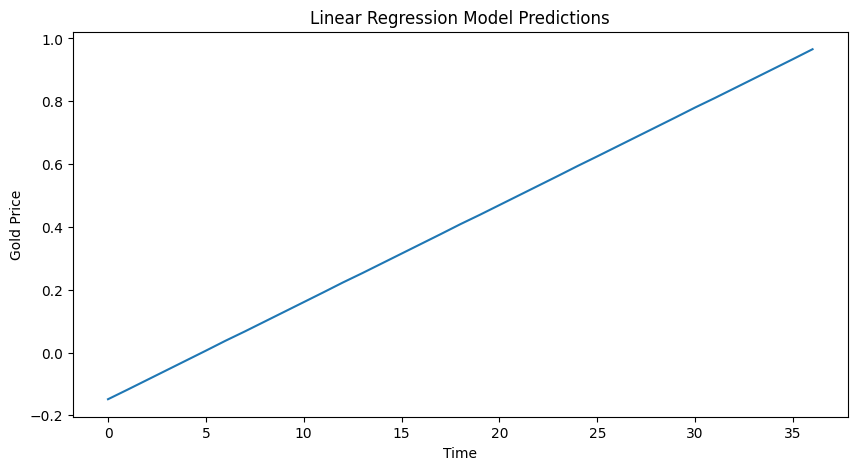

In [171]:
# line plot for lr_predictions

plt.figure(figsize=(10,5))
plt.plot(lr_predictions)
plt.xlabel("Time")
plt.ylabel("Gold Price")
plt.title("Linear Regression Model Predictions")
plt.show()


# **MODEL EVALUATION**

In [172]:
# print all the model rmse values

print('Linear Regression RMSE:', lin_rmse)
print('Exponential Smoothing RMSE:', eaa_rmse)
print('LSTM RMSE:', lstm_rmse)
print('ARIMA RMSE:', arima_rmse)
print('Naive RMSE:', naive_rmse)

Linear Regression RMSE: 0.1502827706126096
Exponential Smoothing RMSE: 0.15830747886580762
LSTM RMSE: 0.17780058049372463
ARIMA RMSE: 0.2260464525148604
Naive RMSE: 0.3707078952252615


# **FORECASTED NEXT 30 DAYS PRICES**

In [173]:
# Create a list of dates for the next 30 days
next_30_days = pd.date_range(gp1.index[-1], periods=30, freq='D')
next_30_days

DatetimeIndex(['2021-12-21', '2021-12-22', '2021-12-23', '2021-12-24',
               '2021-12-25', '2021-12-26', '2021-12-27', '2021-12-28',
               '2021-12-29', '2021-12-30', '2021-12-31', '2022-01-01',
               '2022-01-02', '2022-01-03', '2022-01-04', '2022-01-05',
               '2022-01-06', '2022-01-07', '2022-01-08', '2022-01-09',
               '2022-01-10', '2022-01-11', '2022-01-12', '2022-01-13',
               '2022-01-14', '2022-01-15', '2022-01-16', '2022-01-17',
               '2022-01-18', '2022-01-19'],
              dtype='datetime64[ns]', freq='D')

In [174]:
next_30_days_array = next_30_days.to_numpy().reshape(-1, 1)
next_30_days_array = next_30_days_array.astype(float)

In [175]:
# Use the linear regression model to predict the gold price for the next 30 days
next_30_days_predictions = lrmodel.predict(next_30_days_array)

# Print the predicted gold prices for the next 30 days
next_30_days_predictions

array([0.94500491, 0.94551336, 0.94602181, 0.94653026, 0.94703871,
       0.94754716, 0.94805561, 0.94856406, 0.94907251, 0.94958096,
       0.95008941, 0.95059785, 0.9511063 , 0.95161475, 0.9521232 ,
       0.95263165, 0.9531401 , 0.95364855, 0.954157  , 0.95466545,
       0.9551739 , 0.95568235, 0.9561908 , 0.95669925, 0.95720769,
       0.95771614, 0.95822459, 0.95873304, 0.95924149, 0.95974994])

In [176]:
next_30_days_predictions = pd.DataFrame({'Date': next_30_days, 'forecasted Price': next_30_days_predictions},index=range(len(next_30_days)))
next_30_days_predictions

,Date,forecasted Price
0,2021-12-21,0.945005
1,2021-12-22,0.945513
2,2021-12-23,0.946022
3,2021-12-24,0.946530
4,2021-12-25,0.947039
5,2021-12-26,0.947547
6,2021-12-27,0.948056
7,2021-12-28,0.948564
8,2021-12-29,0.949073
9,2021-12-30,0.949581


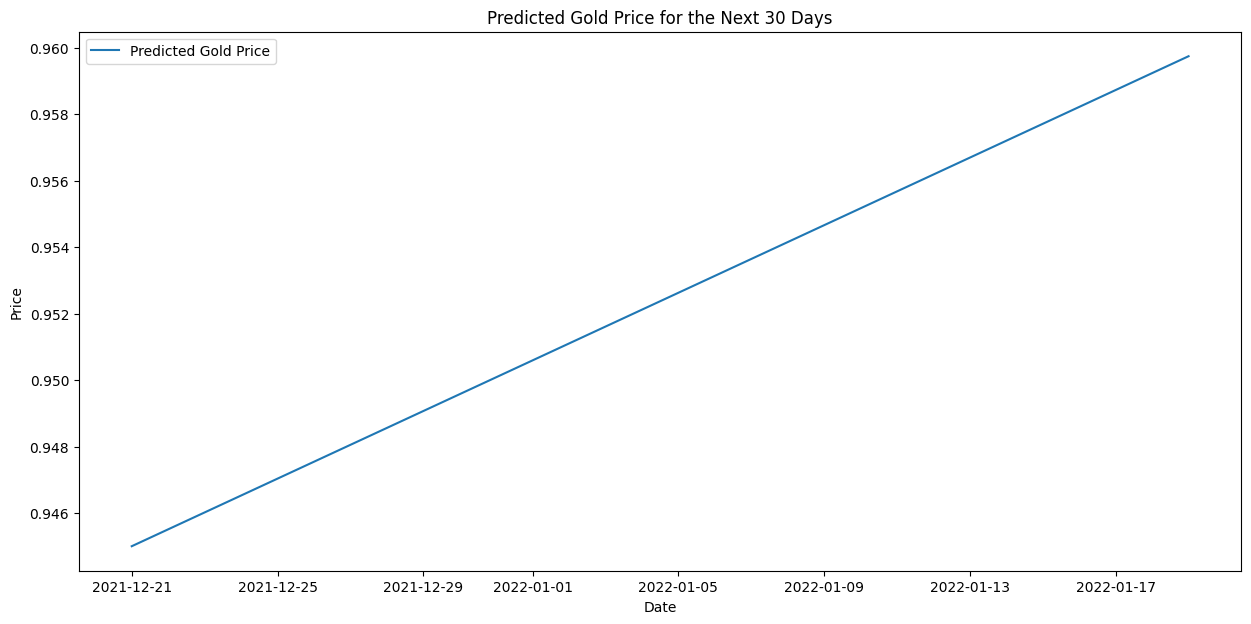

In [177]:
# line plot for next_30_days_predictions

plt.figure(figsize=(15,7))
plt.plot(next_30_days_predictions['Date'], next_30_days_predictions['forecasted Price'], label='Predicted Gold Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Predicted Gold Price for the Next 30 Days')
plt.legend()
plt.show()


## **Denormalize the predicted prices**

In [178]:
print(next_30_days_predictions['forecasted Price'].values.shape)

# reshape next_30_days_predictions

next_30_days_predictions['forecasted Price'] = next_30_days_predictions['forecasted Price'].values.reshape(-1, 1)

# denormalize the forecasted prices

denormalized_prices = scaler.inverse_transform(next_30_days_predictions['forecasted Price'].values.reshape(-1, 1)).flatten()
denormalized_prices = pd.DataFrame(denormalized_prices, columns=['forecasted price'], index=next_30_days_predictions['Date'])
denormalized_prices.head()

(30,)


,forecasted price
Date,
2021-12-21,4339.032307
2021-12-22,4340.024020
2021-12-23,4341.015733
2021-12-24,4342.007446
2021-12-25,4342.999159


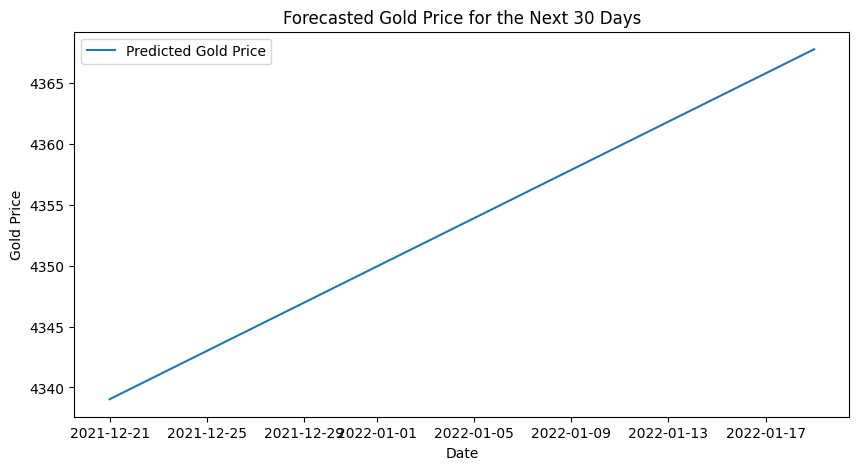

In [179]:
plt.figure(figsize=(10,5))
plt.plot(denormalized_prices['forecasted price'], label="Predicted Gold Price")
plt.xlabel("Date")
plt.ylabel("Gold Price")
plt.title("Forecasted Gold Price for the Next 30 Days")
plt.legend()
plt.show()


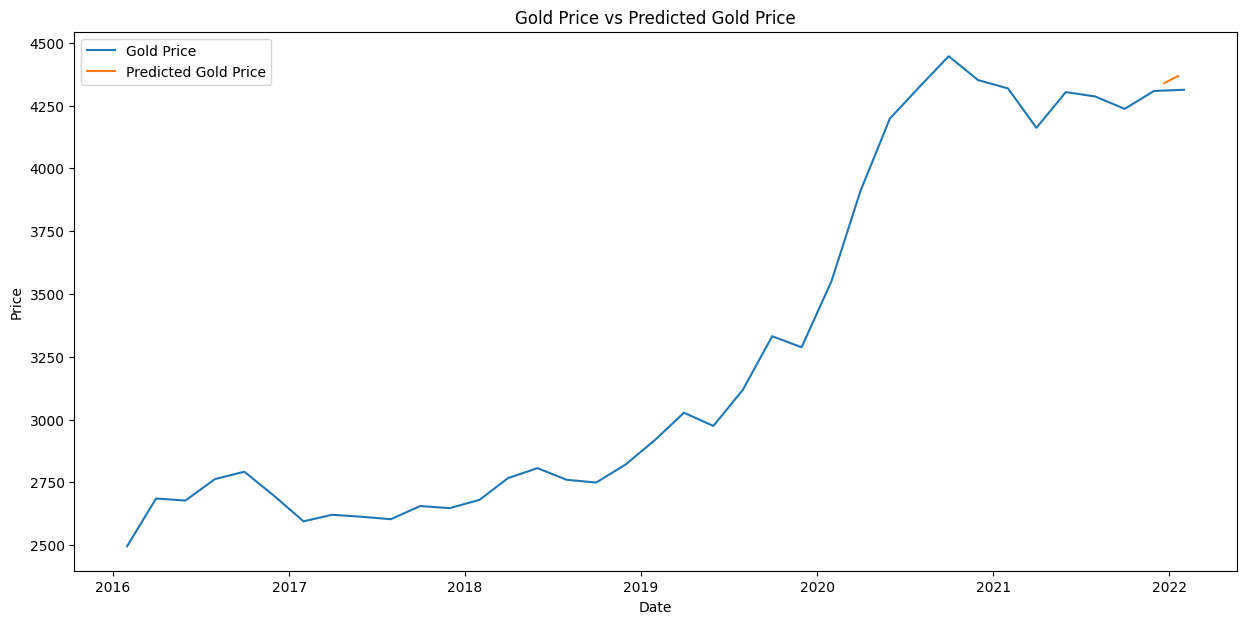

In [180]:
# plot denormalized vs original price

plt.figure(figsize=(15,7))
plt.plot(gp2['price'], label='Gold Price')
plt.plot(denormalized_prices['forecasted price'], label='Predicted Gold Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Price vs Predicted Gold Price')
plt.legend()
plt.show()


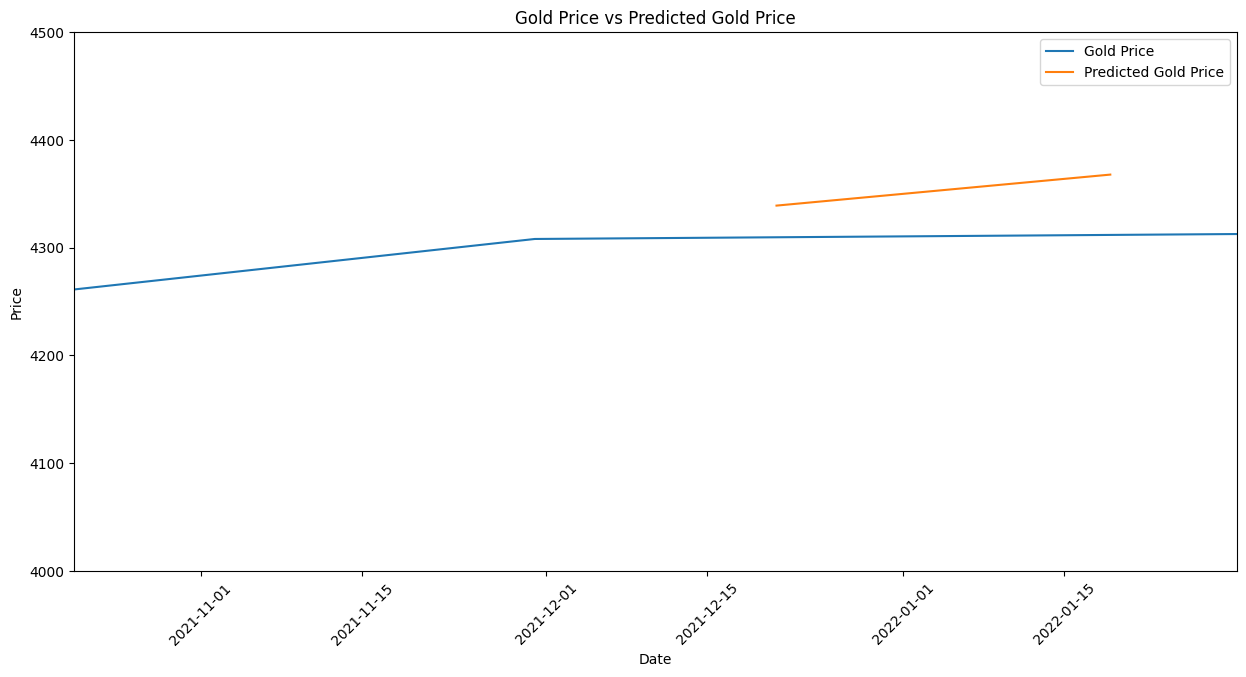

In [181]:
import matplotlib.pyplot as plt

# Convert date strings to datetime objects
start_date = pd.to_datetime('2021-10-21')
end_date = pd.to_datetime('2022-01-30')

# Plotting the gold price and predicted gold price
plt.figure(figsize=(15,7))
plt.plot(gp2['price'], label='Gold Price')
plt.plot(denormalized_prices['forecasted price'], label='Predicted Gold Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Price vs Predicted Gold Price')
plt.legend()

# Setting the x-axis limits
plt.xlim(start_date, end_date)

# Setting the y-axis limits
plt.ylim(4000, 4500)

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)


# Display the plot
plt.show()


# **SAVE THE FINALIZED MODEL TO PICKLE FILE**

In [182]:
import pickle

# Save the trained model to a file
with open('linear_regression_model.pkl', 'wb') as f:
  pickle.dump(lrmodel, f)
